In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [3]:
unipartite = pd.read_csv('../shared-folder-gald/data/edgelist_unipartite.csv')

In [4]:
unipartite

,Source,Target,Weight
0,democraticrepublicans,lewisandclark,1
1,democraticrepublicans,johnadams,1
2,democraticrepublicans,apgovernment,1
3,democraticrepublicans,usconstitution,1
4,democraticrepublicans,barbarypirates,1
...,...,...,...
35570521,iuictv,iuicnigeria,1
35570522,面白い動画,lion,1
35570523,coolartwork,lion,2
35570524,bridalmakeup,fridayfashionfreestyle,1


In [5]:
unique_nodes = pd.unique(pd.concat([unipartite['Source'], unipartite['Target']])).size
print(f"Total unique nodes: {unique_nodes}")


Total unique nodes: 673090


In [7]:
max_weight = unipartite['Weight'].max()
print(f"Max weight: {max_weight}")


Max weight: 47946


In [11]:
count_weight_1 = unipartite[unipartite['Weight'] == 1].shape[0]
print(f"Number of entries with weight=1: {count_weight_1}")


Number of entries with weight=1: 24597785


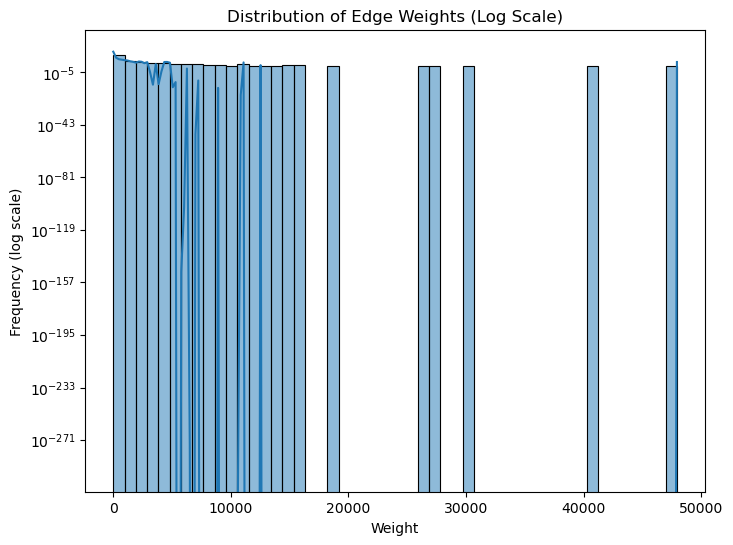

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(unipartite['Weight'], bins=50, kde=True)
plt.yscale('log')  # Log scale for the Y-axis
plt.xlabel('Weight')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Edge Weights (Log Scale)')
plt.show()


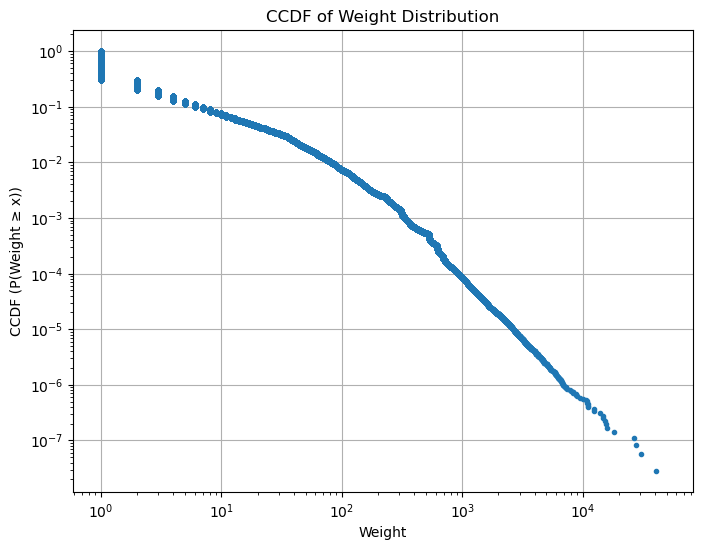

In [13]:

weights = unipartite['Weight']

# Sort weights in ascending order
sorted_weights = np.sort(weights)

# Calculate CCDF: proportion of weights >= each value
ccdf = 1.0 - np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(sorted_weights, ccdf, marker='.', linestyle='none')
plt.xlabel('Weight')
plt.ylabel('CCDF (P(Weight ≥ x))')
plt.title('CCDF of Weight Distribution')
plt.yscale('log')  # Optional: log scale for better visibility if tail is heavy
plt.xscale('log')  # Optional: log scale for x if weight has a wide range
plt.grid(True)
plt.show()


In [ ]:
#this runs for a long time

weights = unipartite['Weight']

# Fit the power law model
fit = powerlaw.Fit(weights, xmin=np.min(weights))

# Get the alpha (power law exponent) and the minimum value from where the power law holds
print(f"Alpha: {fit.alpha}")
print(f"Xmin: {fit.xmin}")

# Compare power law against other distributions
distribution_list = ['lognormal', 'exponential', 'truncated_power_law', 
      'stretched_exponential', 'lognormal_positive']

for distribution in distribution_list:
    R, p = fit.distribution_compare('power_law', distribution) #A positive R implies the Power Law is a better fit, while a negative R implies the alternative distribution is better.
    print("power law vs " + distribution + 
          ": R = " + str(np.round(R,3)) + 
          ", p = " + str(np.round(p,3)))
    
# power law vs lognormal: R = 34296.196, p = 0.0
# power law vs exponential: R = 56529196.218, p = 0.0
# Assuming nested distributions
# power law vs truncated_power_law: R = 0.024, p = 0.825
# power law vs stretched_exponential: R = 2671318.95, p = 0.0
# power law vs lognormal_positive: R = 18001915.916, p = 0.0

Alpha: 2.941328551286547
Xmin: 1.0


/Users/renatasapeta/anaconda3/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


power law vs lognormal: R = 34296.196, p = 0.0
power law vs exponential: R = 56529196.218, p = 0.0


Assuming nested distributions


power law vs truncated_power_law: R = 0.024, p = 0.825
power law vs stretched_exponential: R = 2671318.95, p = 0.0
power law vs lognormal_positive: R = 18001915.916, p = 0.0
